# Homework 09
This homework is based on the classification and regression lectures.

## Question 1
#### In the table below, fill in the definition column with a short (no more than two sentence) definition for each vocab word. If it can be summarized by a formula, give the formula.

| Vocab Word | Definition |
|:--------|:--------|
| **One-hot coding** | Converts categorical into binary for all options |
| **Feature selection*** | Restricting regression to the important variables |
| **Classifier** | Assigns inputs to categories |
| **Precision** | The proportion of positively classified results that are correct|
| **Recall** | The proportion of correctly classified results that are positive |
| **F1 Score** | Harmonic mean of precisino and recall |
| **Parsimonious model** | A model that is accurate while having few parameters (simplicity) |
| **Ridge regression** | Penalty is based on square of magnitude of coefficients |
| **LASSO regression** | Penalty is based on absolute values of coefficients |
| **Cross validation** | Splitting data into k folds and using one as a test set |
| **Tree based methods** | Posing questions about our data to divide it into smaller pieces and correctly classify |

*Just give the general idea.

## Question 2
#### a) What shape does a perfect classifier look like on an ROC curve? What about a bad classifier?
A perfect classifier looks like a square, with a line at y = 1 until x = 1. The worst possible curve is the line y = x, so a bad classifier is close to this.
#### b) Think about the formula for an F1 score. What does it mean when the F1 score is close to 1? Close to 0?
Close to 1 implies that both precision and recall are close to 1.
Close to 0 implies that one or both of precision and recall is very low.

## Question 3
#### Compare the following aspects of linear vs. logistic regression.
|  | Linear | Logistic |
|:--------|:--------|:--------|
| **Chart Shape** | Straight line | S shaped curve |
| **Dependent Variable Type** | Continuous | Categorical |
| **Purpose** (regression or classification) | Regression | Classification |
| **Range of output variable** ($y_i$ or $p_i$) | All real numbers | [0,1] - or probability |
| **Method*** | Least squares | Likelihood estimation |
| **Example of use** | Predicting test score based on studying habits | Predicting whether a mushroom is edible based on physiology |  
  
*Meaning ordinary least squares or maximum likelihood estimation

## Question 4
#### Why is it important to train then test our model? How do we do that? (2-3 sentences. Not looking for code, just general explanation).

It is important to train and then test so that we can ensure our data wasn't overfitted by mapping to similar, but not identical data. This can help our model move from theoretical to real-world applications

## Question 5
This question runs through a linear regression example. We want to predict median house value based on the other variables.
#### a) First, load the `housing.csv` data set. Look at the data in some useful way. Why is linear regression appropriate here?

In [2]:
housing <- read.csv("data/housing.csv")
summary(housing)
head(housing)

   longitude         latitude     housing_median_age  total_rooms   
 Min.   :-124.3   Min.   :32.54   Min.   : 1.00      Min.   :    2  
 1st Qu.:-121.8   1st Qu.:33.93   1st Qu.:18.00      1st Qu.: 1448  
 Median :-118.5   Median :34.26   Median :29.00      Median : 2127  
 Mean   :-119.6   Mean   :35.63   Mean   :28.64      Mean   : 2636  
 3rd Qu.:-118.0   3rd Qu.:37.71   3rd Qu.:37.00      3rd Qu.: 3148  
 Max.   :-114.3   Max.   :41.95   Max.   :52.00      Max.   :39320  
   population      households     median_income     median_house_value
 Min.   :    3   Min.   :   1.0   Min.   : 0.4999   Min.   : 14999    
 1st Qu.:  787   1st Qu.: 280.0   1st Qu.: 2.5634   1st Qu.:119600    
 Median : 1166   Median : 409.0   Median : 3.5348   Median :179700    
 Mean   : 1425   Mean   : 499.5   Mean   : 3.8707   Mean   :206856    
 3rd Qu.: 1725   3rd Qu.: 605.0   3rd Qu.: 4.7432   3rd Qu.:264725    
 Max.   :35682   Max.   :6082.0   Max.   :15.0001   Max.   :500001    

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value
,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<int>
1,-122.23,37.88,41,880,322,126,8.3252,452600
2,-122.22,37.86,21,7099,2401,1138,8.3014,358500
3,-122.24,37.85,52,1467,496,177,7.2574,352100
4,-122.25,37.85,52,1274,558,219,5.6431,341300
5,-122.25,37.85,52,1627,565,259,3.8462,342200
6,-122.25,37.85,52,919,413,193,4.0368,269700


Linear regression is appropriate since most, if not all, of our categories are numeric, and there is no clear classification target.

#### b) Scale data and split it 75/25 training/testing. Set seed = 123.

In [18]:
library(dplyr)
set.seed(123)
# 3. Scale data.
scale <- function(a){
  (a - min(a))/(max(a)-min(a))
}

housing_num <- housing |> select(where(is.numeric)) |>
  mutate(across(where(is.numeric), scale))

# KEY DIFFERENCE
# 4. Split data - 75% training and 25% testing.
housing_train <- runif(nrow(housing_num)) < 0.75
housing_test <- !train




#### c) Fit the model.

In [13]:
housing_model <- lm(median_house_value ~ ., housing |> filter(housing_train))
summary(housing_model)


Call:
lm(formula = median_house_value ~ ., data = filter(housing, train))

Residuals:
    Min      1Q  Median      3Q     Max 
-541387  -44436  -11291   31032  508265 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -3.527e+06  7.253e+04  -48.63   <2e-16 ***
longitude          -4.238e+04  8.284e+02  -51.16   <2e-16 ***
latitude           -4.269e+04  7.836e+02  -54.48   <2e-16 ***
housing_median_age  1.107e+03  5.003e+01   22.13   <2e-16 ***
total_rooms        -1.459e+00  7.930e-01   -1.84   0.0658 .  
population         -4.670e+01  1.269e+00  -36.81   <2e-16 ***
households          1.555e+02  5.030e+00   30.93   <2e-16 ***
median_income       3.840e+04  3.652e+02  105.14   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 69600 on 15381 degrees of freedom
Multiple R-squared:  0.6353,	Adjusted R-squared:  0.6351 
F-statistic:  3827 on 7 and 15381 DF,  p-value: < 2.2e-16


#### d) Make predictions on test data and show them in an actual vs. predicted plot.

Warning message in geom_segment(aes(x = 0, y = 0, xend = 1, yend = 1)):
“All aesthetics have length 1, but the data has 5251 rows.
ℹ Please consider using `annotate()` or provide this layer with data containing
  a single row.”


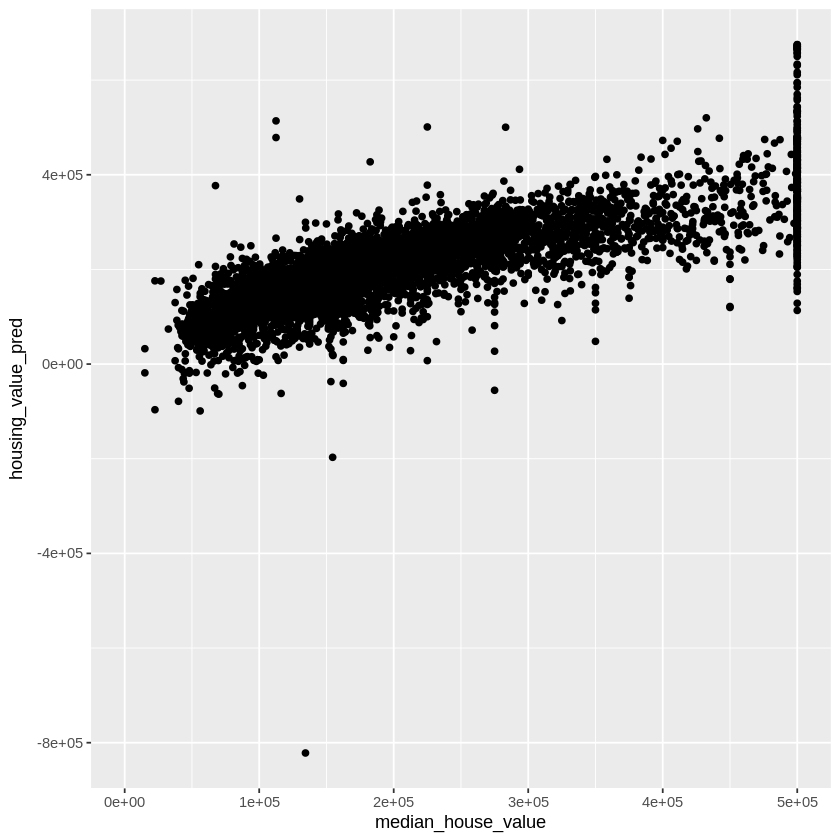

In [15]:
library(ggplot2)
dx <- housing |> filter(housing_test)

dx <- dx |>
  mutate(housing_value_pred = predict(housing_model, dx |> as.data.frame()))

# 7. Predicted vs actual plot.
ggplot(dx, aes(median_house_value, housing_value_pred)) + geom_point() + geom_segment(aes(x=0,y=0,xend=1,yend=1))


#### e) Make a residuals plot.

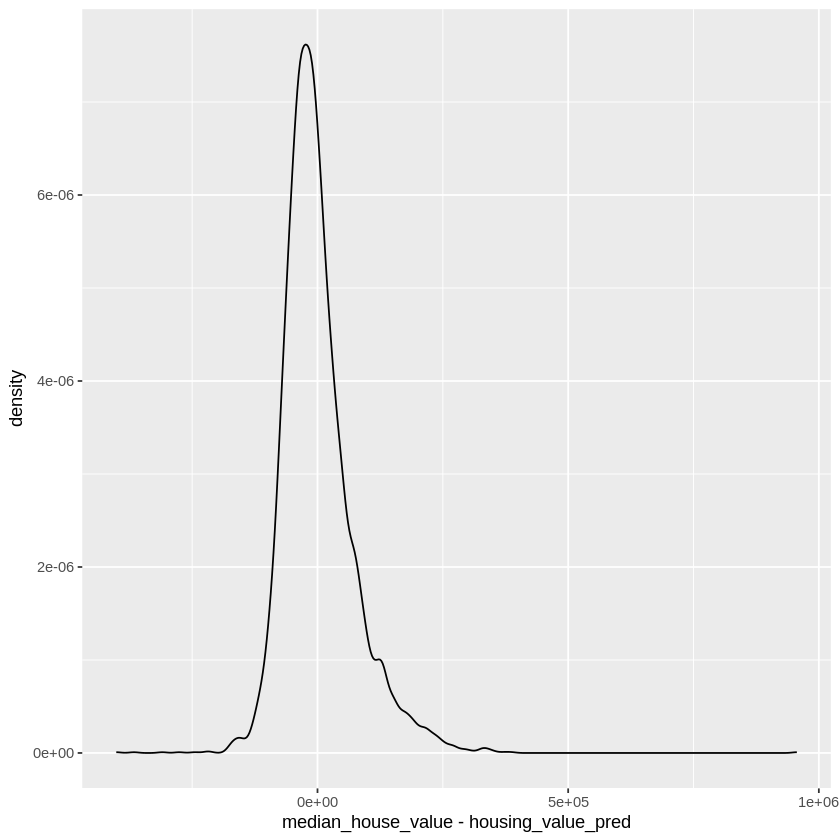

In [16]:
ggplot(dx, aes(median_house_value-housing_value_pred)) + geom_density()

## Question 6
This question runs through a logistic regression example. We want to predict diabetes diagnosis based on the other variables.
#### a) First, load the `diabetes.csv` data set. Look at the data in some useful way. Why is logistic regression appropriate here?

In [17]:
diabetes <- read.csv("data/diabetes.csv")
summary(diabetes)
head(diabetes)

  Pregnancies        Glucose      BloodPressure    SkinThickness  
 Min.   : 0.000   Min.   :  0.0   Min.   :  0.00   Min.   : 0.00  
 1st Qu.: 1.000   1st Qu.: 99.0   1st Qu.: 62.00   1st Qu.: 0.00  
 Median : 3.000   Median :117.0   Median : 72.00   Median :23.00  
 Mean   : 3.845   Mean   :120.9   Mean   : 69.11   Mean   :20.54  
 3rd Qu.: 6.000   3rd Qu.:140.2   3rd Qu.: 80.00   3rd Qu.:32.00  
 Max.   :17.000   Max.   :199.0   Max.   :122.00   Max.   :99.00  
    Insulin           BMI        DiabetesPedigreeFunction      Age       
 Min.   :  0.0   Min.   : 0.00   Min.   :0.0780           Min.   :21.00  
 1st Qu.:  0.0   1st Qu.:27.30   1st Qu.:0.2437           1st Qu.:24.00  
 Median : 30.5   Median :32.00   Median :0.3725           Median :29.00  
 Mean   : 79.8   Mean   :31.99   Mean   :0.4719           Mean   :33.24  
 3rd Qu.:127.2   3rd Qu.:36.60   3rd Qu.:0.6262           3rd Qu.:41.00  
 Max.   :846.0   Max.   :67.10   Max.   :2.4200           Max.   :81.00  
    Outcome  

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1
6,5,116,74,0,0,25.6,0.201,30,0


#### b) Scale data and split it 75/25 training/testing. Set seed = 123.

In [34]:
set.seed(123)
# 3. Scale data.

# KEY DIFFERENCE
# 4. Split data - 75% training and 25% testing.
n <- nrow(diabetes)
train_idx <- sample.int(n, size = floor(0.75 * n))
d_train <- diabetes %>% slice(train_idx)
d_test  <- diabetes %>% slice(setdiff(seq_len(n), train_idx))


#### c) Fit the model.

In [35]:
logit_model <- glm(Outcome ~ ., data = d_train, family = "binomial")
summary(logit_model)


Call:
glm(formula = Outcome ~ ., family = "binomial", data = d_train)

Coefficients:
                          Estimate Std. Error z value Pr(>|z|)    
(Intercept)              -8.439467   0.818894 -10.306  < 2e-16 ***
Pregnancies               0.116520   0.037504   3.107  0.00189 ** 
Glucose                   0.036804   0.004438   8.293  < 2e-16 ***
BloodPressure            -0.013655   0.005931  -2.302  0.02131 *  
SkinThickness             0.004829   0.007856   0.615  0.53875    
Insulin                  -0.001352   0.001011  -1.337  0.18117    
BMI                       0.085151   0.017263   4.932 8.12e-07 ***
DiabetesPedigreeFunction  0.719555   0.329791   2.182  0.02912 *  
Age                       0.015870   0.010877   1.459  0.14456    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 745.11  on 575  degrees of freedom
Residual deviance: 538.57  on 567  degrees of freedom
AIC: 556.5

#### d) Make predictions on test data. Print a table with the number of true positives, false positives, true negatives, false negatives, and accuracy.

In [36]:
p <- predict(logit_model, newdata = d_test, type = "response")
pred <- as.integer(p >= 0.5)
truth <- d_test$Outcome

tp <- sum(pred == 1 & truth == 1)
fp <- sum(pred == 1 & truth == 0)
tn <- sum(pred == 0 & truth == 0)
fn <- sum(pred == 0 & truth == 1)
acc <- (tp + tn) / (tp + fp + tn + fn)

df <- tibble(
  measure = c("True Positive", "False Positive", "True Negative", "False Negative", "Accuracy"),
  value   = c(tp, fp, tn, fn, acc)
)

df



measure,value
<chr>,<dbl>
True Positive,36.0000000
False Positive,13.0000000
True Negative,112.0000000
False Negative,31.0000000
Accuracy,0.7708333


#### e) Fit a LASSO-regularized logistic regression model. Again, set seed = 123. Which variables are the most important (which ones don't go to zero)? How does the LASSO model affect the accuracy?

In [40]:
library(glmnet)
set.seed(123)
# Response and predictor matrices
y <- diabetes$Outcome
X <- model.matrix(Outcome ~ ., diabetes)[, -1]   # remove intercept column

# Fit cross-validated LASSO
cvfit <- cv.glmnet(X, y, alpha = 1)
fit <- cvfit$glmnet.fit

best_fit <- glmnet(X,y,lambda=cvfit$lambda.min)
best_fit$beta

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘iterators’, ‘foreach’, ‘shape’, ‘RcppEigen’


Loading required package: Matrix

Loaded glmnet 4.1-10



8 x 1 sparse Matrix of class "dgCMatrix"
                                    s0
Pregnancies               0.0199336782
Glucose                   0.0057930295
BloodPressure            -0.0020190738
SkinThickness             .           
Insulin                  -0.0001251608
BMI                       0.0127488854
DiabetesPedigreeFunction  0.1374339816
Age                       0.0024245727

#### f) Make a plot of actual vs. predicted values for the LASSO model.

`geom_smooth()` using formula = 'y ~ x'
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at -0.005”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 1.005”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  0”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 1.01”


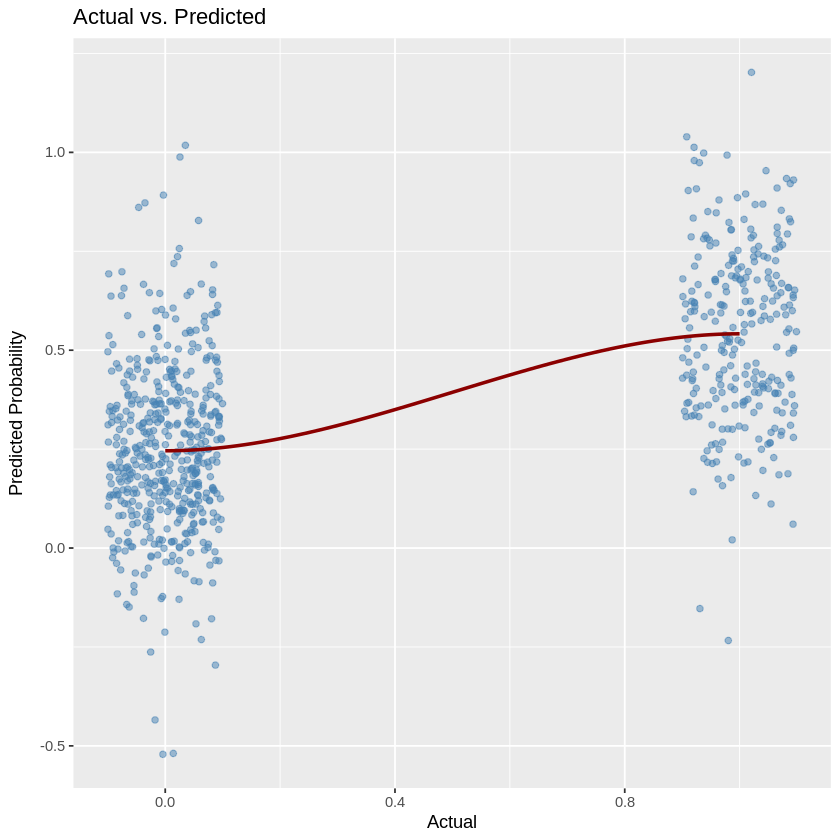

In [41]:
pred_prob <- predict(best_fit, newx = X, type = "response")

plot_data <- data.frame(
  Actual = y,
  Predicted = as.vector(pred_prob)
)


dx <- dx |>
  mutate(housing_value_pred = predict(housing_model, dx |> as.data.frame()))


ggplot(plot_data, aes(x = Actual, y = Predicted)) +
  geom_jitter(width = 0.1, height = 0, alpha = 0.5, color = "steelblue") +
  geom_smooth(method = "loess", se = FALSE, color = "darkred") +
  labs(title = "Actual vs. Predicted",
       x = "Actual",
       y = "Predicted Probability")
